In [ ]:
#ELIF model, Amirhossein Mirzade, 96222082

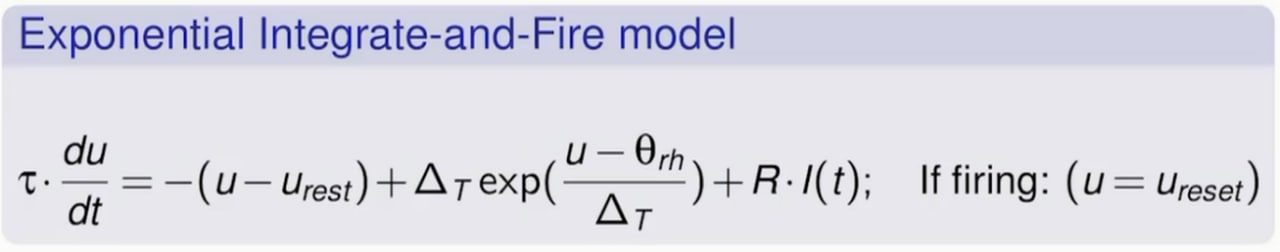

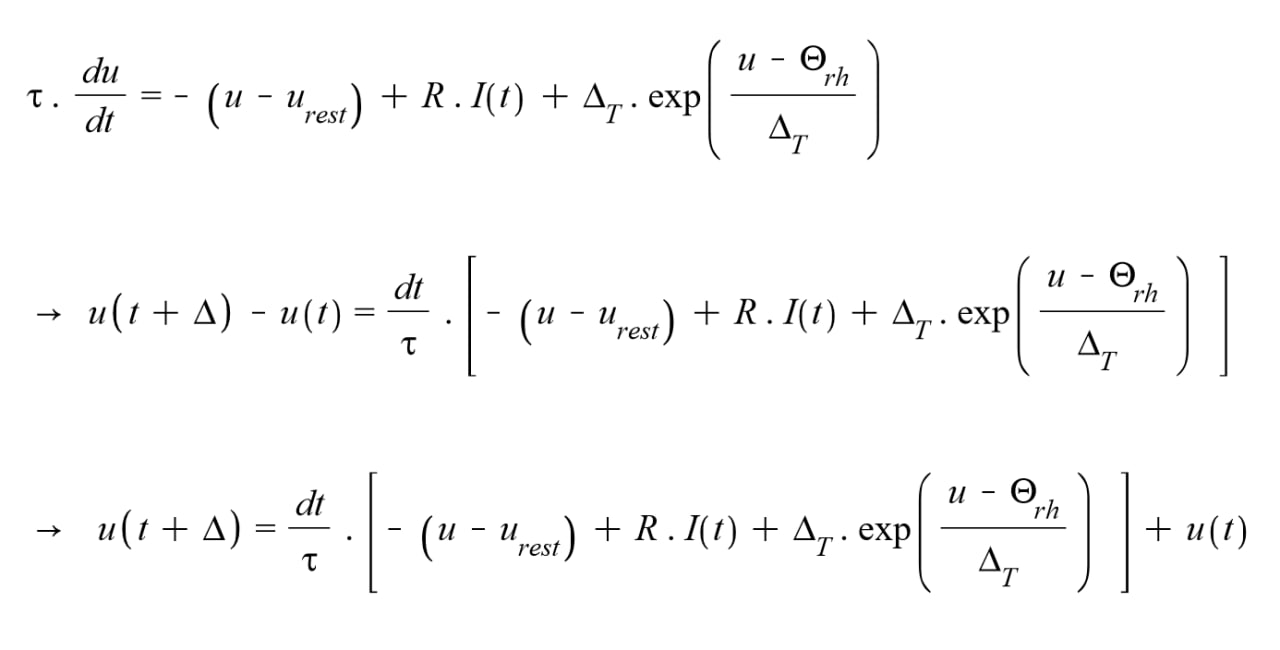

In [1]:
import numpy as np
from matplotlib.pyplot import *
import random
import math

I Functions

I_Interval: fixed flow in a specific duration

I_Linear: linear i function

I_Sine: sine i function

I_Constant: constant i function

I_Step: step by step fixed flow in specific durations

In [3]:
def i_interval(time, i=5, duration=(20, 80)):
    start, end = duration
    if start < time < end:
        return i
    return 0


def i_linear(time, c=2):
    return c * time


def i_sine(time, c=10):
    return c * (0.9 + math.sin(time))


def i_constant(time, i=5):
    return i


def i_step(time, i=5, d1=(20, 30), d2=(40, 70)):
    s1, e1 = d1
    s2, e2 = d2
    if s1 < time < e1 or s2 < time < e2:
        return i
    return 0

Implement ELIF Class

time: time duration

dt: steps for measuring potential

i_function: function to calculate flow

u_rest: resting potential

r: circuit resistance

c: capacitor capacity

threshold: action potential

delta_t: sharpness parameter

theta_rh: firing threshold

In [4]:
class ELIF:
    def __init__(self, time=100, dt=0.125, i_function=i_interval, u_rest=0, r=1, c=10, threshold=5, delta_t=2,
                theta_rh=2):
        self.time = time
        self.dt = dt
        self.i_function = i_function
        self.u_rest = u_rest
        self.r = r
        self.c = c
        self.threshold = threshold
        self.delta_t = delta_t
        self.theta_rh = theta_rh
        self.u = []
        self.init_u()
        
    def spike_time(self, i):
        timer = np.arange(0, self.time + self.dt, self.dt)
        time_const = self.r * self.c
        u = [self.u_rest for i in range(len(timer))]
        i_input = [i_constant(j, i=i) for j in timer]
        spike_t = self.time
        current_spike_time = 0
        
        for j in range(len(timer)):
            u[j] = u[j - 1] + ((self.r * i_input[j] - (u[j - 1] - self.u_rest) + self.delta_t * math.exp(
                (u[j - 1] - self.theta_rh) / self.delta_t)) / time_const) * self.dt
            if u[j] >= self.threshold:
                u[j] = self.u_rest
                prev_spike_time = current_spike_time
                current_spike_time = timer[j]
                spike_t = min(spike_t, current_spike_time - prev_spike_time)
                
        return spike_t

    def init_u(self):
        timer = np.arange(0, self.time + self.dt, self.dt)
        time_const = self.r * self.c
        u = [self.u_rest for i in range(len(timer))]
        i_input = [self.i_function(j) for j in timer]
        
        for j in range(len(timer)):
            u[j] = u[j - 1] + ((self.r * i_input[j] - (u[j - 1] - self.u_rest) + self.delta_t * math.exp(
                (u[j - 1] - self.theta_rh) / self.delta_t)) / time_const) * self.dt
            if u[j] >= self.threshold:
                u[j] = self.u_rest
                
        self.u = u

    def plot(self, u_t=False, i_t=False, f_i=False):
        fig = figure(num=None, figsize=(20, 10))
        fig.suptitle('Exponential Leaky Integrate and Fire\n\n' +
                     "R: " + str(self.r) +
                     "    C: " + str(self.c) +
                     "    I: " + (str(self.i_function.__doc__).strip()) +
                     "    THRESHOLD: " + str(self.threshold) + 
                     "    THETA_RH: " + str(self.theta_rh) + 
                     "    DELTA_T: " + str(self.delta_t), fontsize=14, fontweight='bold')
        
        timer = np.arange(0, self.time + self.dt, self.dt)
        i_input = [self.i_function(j) for j in timer]
        
        if u_t:
            subplot(221)
            plot(timer, self.u)
            ylabel('U')
            xlabel('Time')
            title('U - Time plot')
            grid(True)
                
        if i_t:
            subplot(221)
            plot(timer, i_input)
            ylabel('I')
            xlabel('Time')
            title('I - Time plot')
            grid(True)
            
        if f_i:
            time_const = self.r * self.c
            i_x = np.arange(0, max(i_input), self.dt)
            i_y = [0 for _ in range(len(i_x))]
            
            for j in range(len(i_x)):
                try:
                    i_y[j] = 1 / (self.spike_time(i_x[j]))
                except:
                    i_y[j] = 0
            subplot(221)
            plot(i_x, i_y)
            ylabel('F')
            xlabel('I')
            title('F - I plot')
            grid(True)

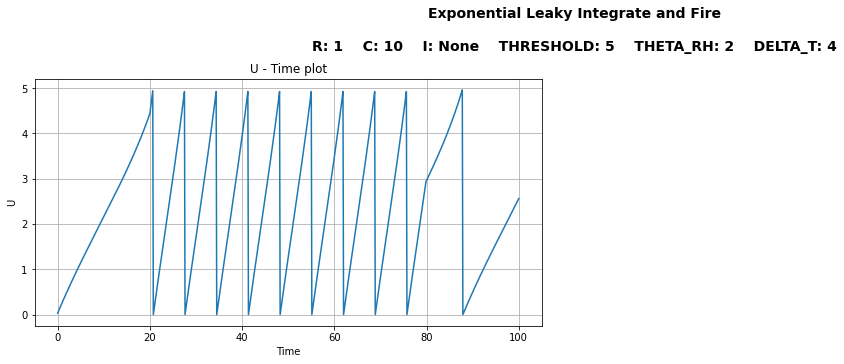

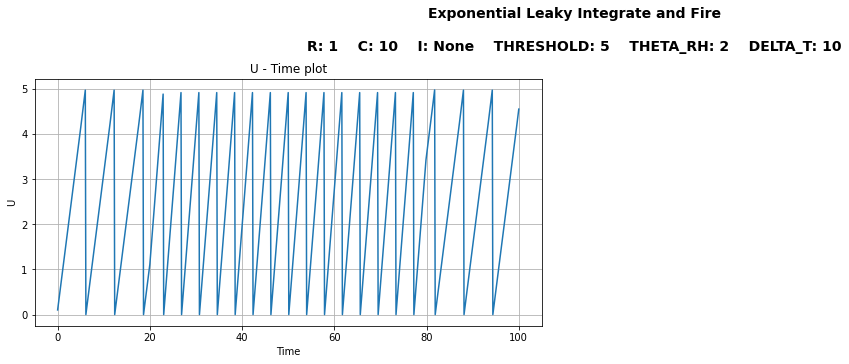

In [5]:
#sharpness parameter effect
Elif = ELIF(delta_t=4)
Elif.plot(u_t=True)

Elif = ELIF(delta_t=10)
Elif.plot(u_t=True)

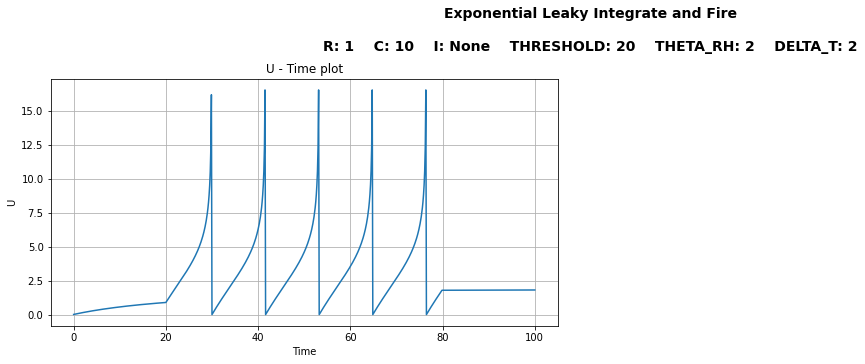

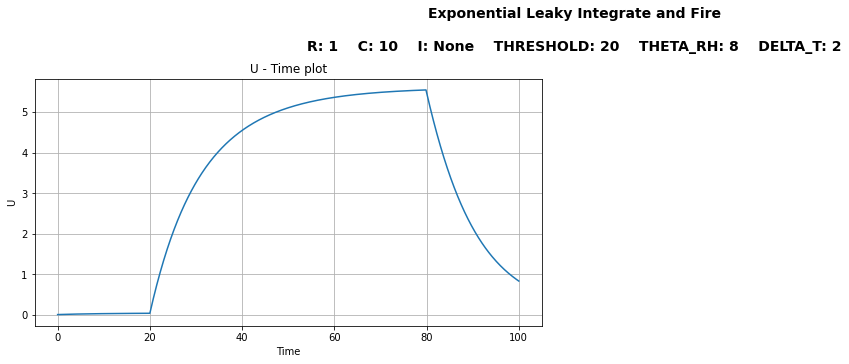

In [6]:
#firing treshold change effect
Elif = ELIF(theta_rh=2, threshold=20)
Elif.plot(u_t=True)

Elif = ELIF(theta_rh=8, threshold=20)
Elif.plot(u_t=True)

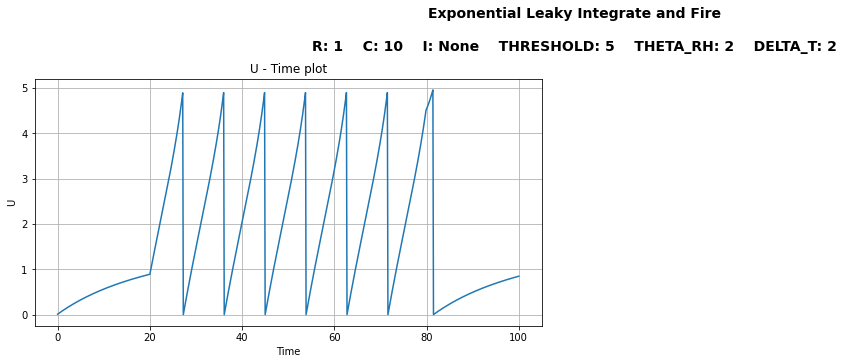

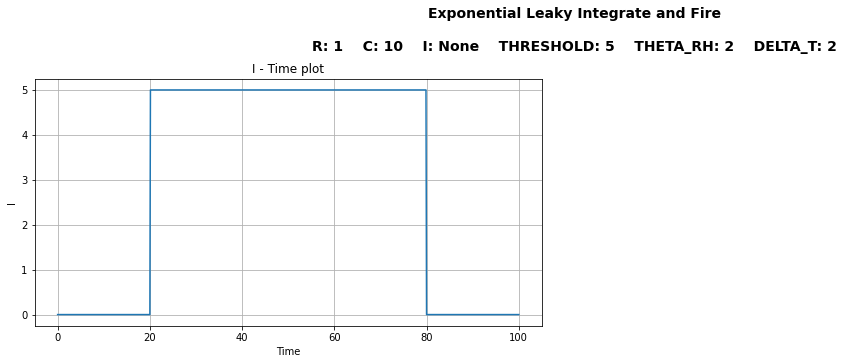

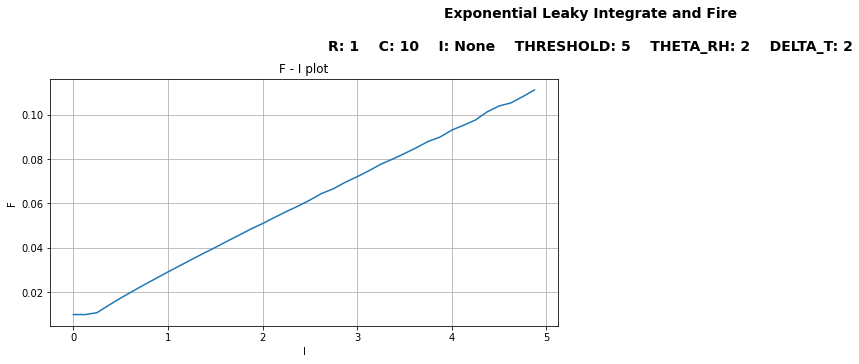

In [7]:
Elif = ELIF(i_function=i_interval)
Elif.plot(u_t=True)
Elif.plot(i_t=True)
Elif.plot(f_i=True)

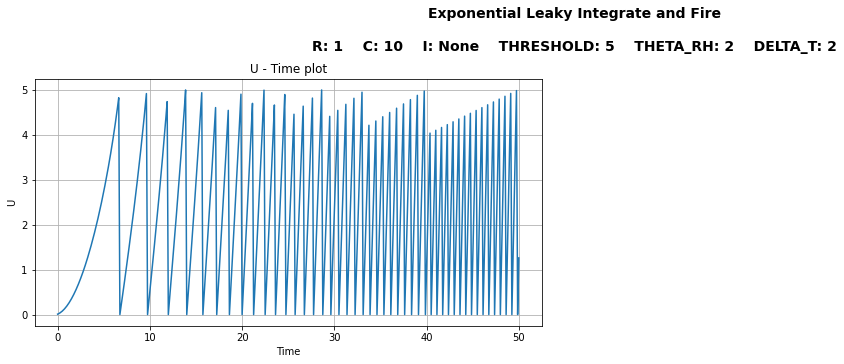

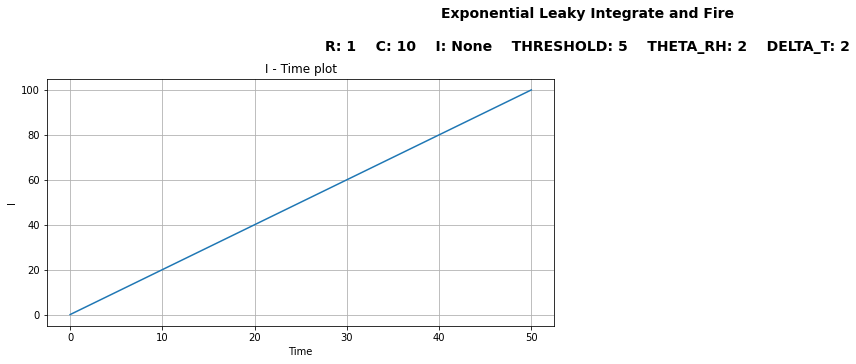

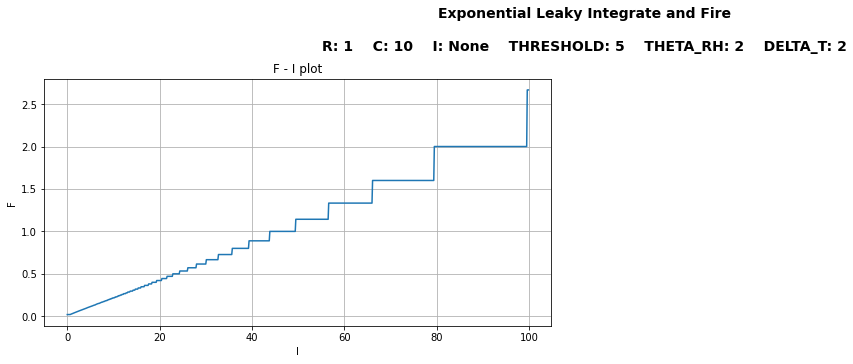

In [8]:
Elif = ELIF(i_function=i_linear, time=50)
Elif.plot(u_t=True)
Elif.plot(i_t=True)
Elif.plot(f_i=True)

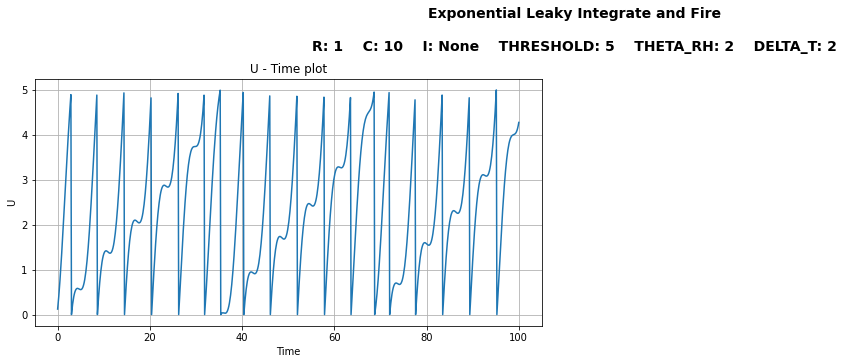

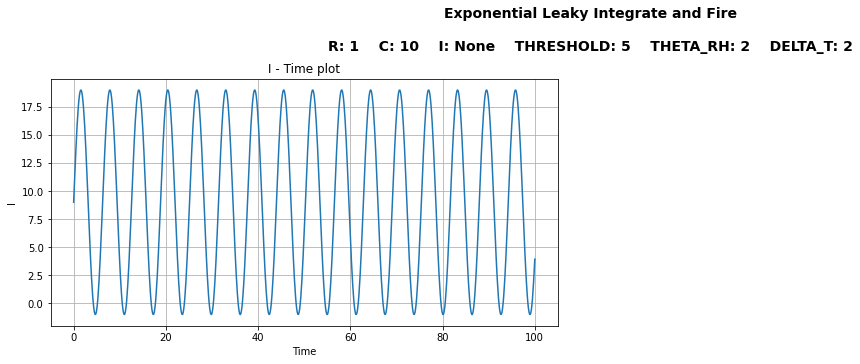

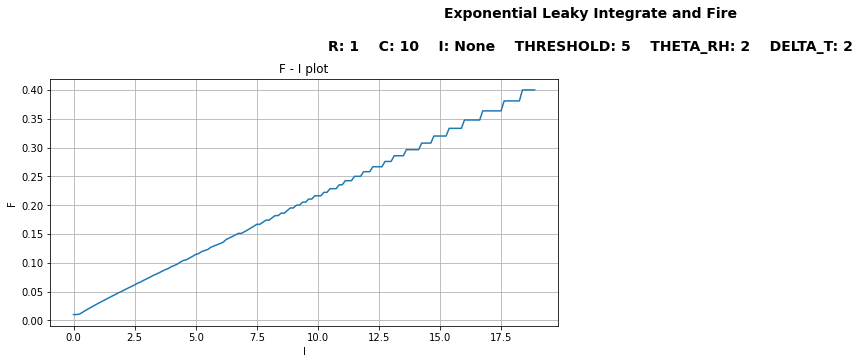

In [9]:
Elif = ELIF(i_function=i_sine)
Elif.plot(u_t=True)
Elif.plot(i_t=True)
Elif.plot(f_i=True)

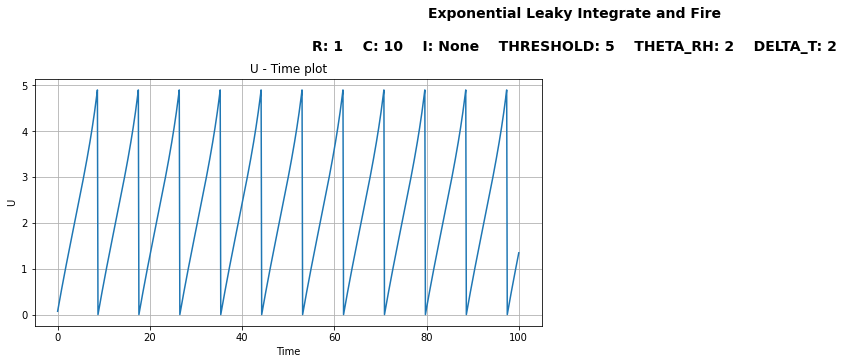

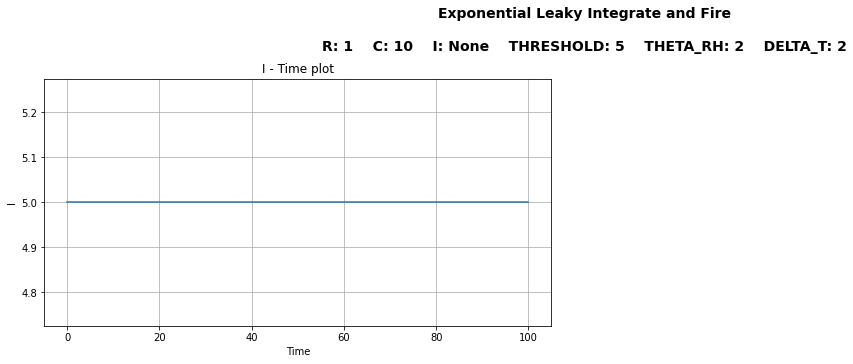

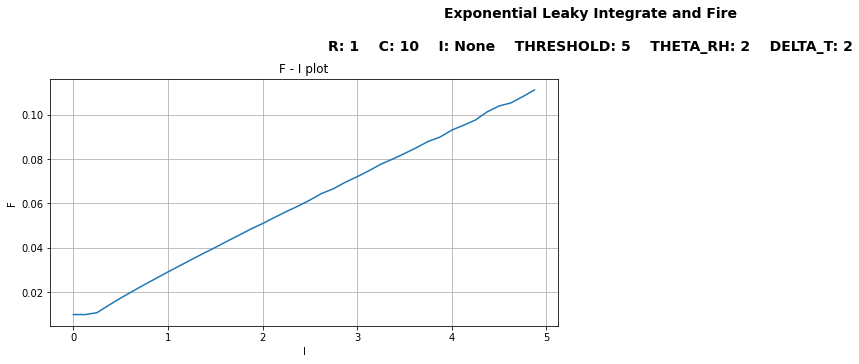

In [10]:
Elif = ELIF(i_function=i_constant)
Elif.plot(u_t=True)
Elif.plot(i_t=True)
Elif.plot(f_i=True)

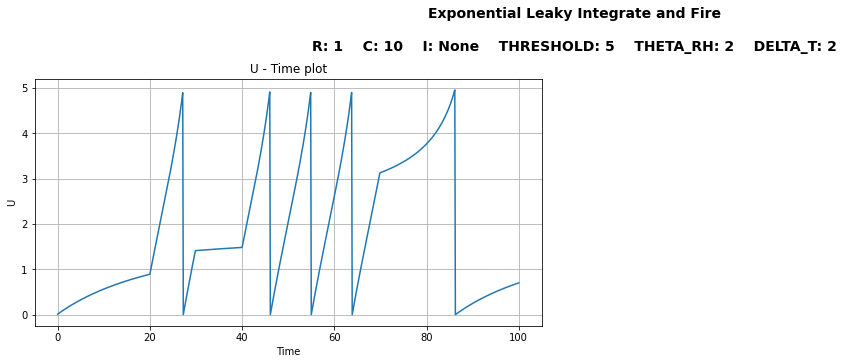

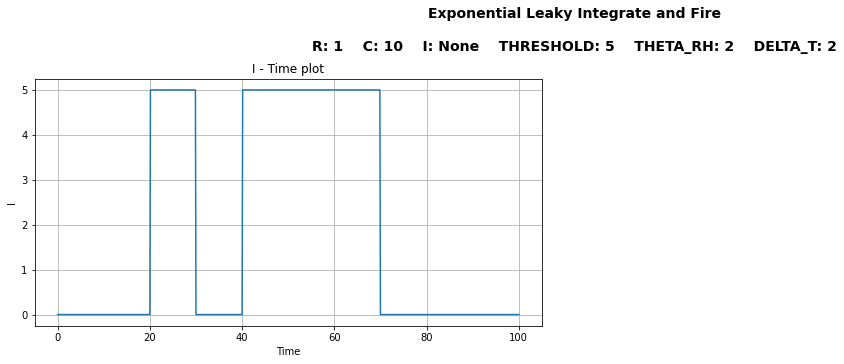

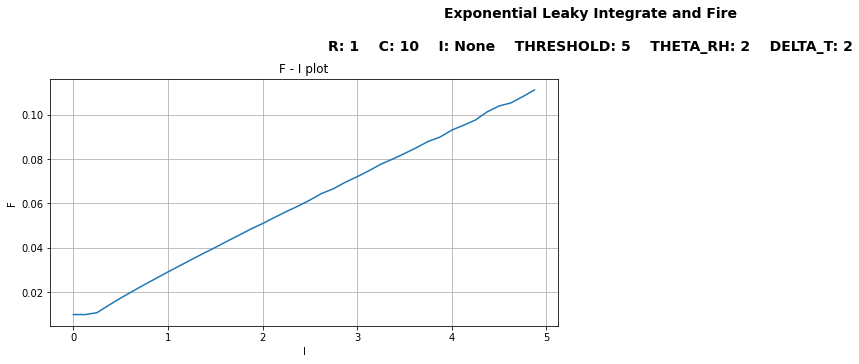

In [11]:
Elif = ELIF(i_function=i_step)
Elif.plot(u_t=True)
Elif.plot(i_t=True)
Elif.plot(f_i=True)